### use sciann kernel


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
%matplotlib inline

In [2]:
# set noise_level to 0.005 or 0.05
noise_level = 0.05

root_dir = f"Noise_{noise_level}"

# FBPINN dataframe
def parse_params(param_string):
    return [float(x) for x in param_string.strip('[]').split()]

# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    metrics_files = [f for f in os.listdir(root_dir) if "parameters" in f and "FBPINN" in f]

    print(metrics_files)
    # convert metrics files to dataframes
    metrics_dfs = [pd.read_csv(f"{root_dir}/{f}") for f in metrics_files]
    metrics_dfs[0].head()
    
fbpinn_df = metrics_dfs[0] 
fbpinn_df['true_params'] = fbpinn_df['true_params'].apply(parse_params)
fbpinn_df['learned_params'] = fbpinn_df['learned_params'].apply(parse_params)
fbpinn_df['true_params'] = fbpinn_df['true_params'].apply(lambda x: np.array(x))

# SciANN dataframe
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    metrics_files = [f for f in os.listdir(root_dir) if "params" in f and "SciANN" in f]

    print(metrics_files)
    # convert metrics files to dataframes
    metrics_dfs = [pd.read_csv(f"{root_dir}/{f}") for f in metrics_files]
    metrics_dfs[0].head()
    
sciann_df = metrics_dfs[0] 

# to list
sciann_df['true_params'] = sciann_df['true_params'].apply(parse_params)
sciann_df['learned_params'] = sciann_df['learned_params'].apply(parse_params)
sciann_df['true_params'] = sciann_df['true_params'].apply(lambda x: np.array(x))

Directory exists: Noise_0.05
['FBPINN_combined_parameters.csv']
Directory exists: Noise_0.05
['SciANN_combined_params.csv']


In [3]:
# marge sciann_df and fbpinn_df into df
fbpinn_df['true_params'] = fbpinn_df['true_params'].apply(tuple)
sciann_df['true_params'] = sciann_df['true_params'].apply(tuple)
merged_df = pd.merge(fbpinn_df, sciann_df, on=['model_type', 'time_limit', 'true_params'], how='outer', suffixes=('_fbpinn', '_sciann'))

merged_df.head()

,tag_fbpinn,model_type,time_limit,true_params,learned_params_fbpinn,tag_sciann,learned_params_sciann
0,FBPINN,sg,0-10,"(1.0,)",[0.9915],SciANN,[0.9916]
1,FBPINN,sg,10-24,"(1.0,)",[0.9995],SciANN,[1.0097]
2,FBPINN,sg,0-24,"(1.0,)",[0.9917],SciANN,[1.0042]
3,FBPINN,coexistence,0-10,"(0.5, 0.7, 0.3, 0.3, 0.6)","[0.59, 0.6991, 0.3004, 0.2486, 0.662]",SciANN,"[0.1268, 0.6594, 0.3439, 0.2504, 0.5629]"
4,FBPINN,coexistence,10-24,"(0.5, 0.7, 0.3, 0.3, 0.6)","[0.3266, 0.4222, 0.513, 0.0313, 0.809]",SciANN,"[0.3792, 0.3122, 0.5978, -0.0, 0.8287]"


In [4]:
# drop model_type that has 'sg'
merged_df = merged_df[~merged_df['model_type'].str.contains('sg')]
merged_df.head()

,tag_fbpinn,model_type,time_limit,true_params,learned_params_fbpinn,tag_sciann,learned_params_sciann
3,FBPINN,coexistence,0-10,"(0.5, 0.7, 0.3, 0.3, 0.6)","[0.59, 0.6991, 0.3004, 0.2486, 0.662]",SciANN,"[0.1268, 0.6594, 0.3439, 0.2504, 0.5629]"
4,FBPINN,coexistence,10-24,"(0.5, 0.7, 0.3, 0.3, 0.6)","[0.3266, 0.4222, 0.513, 0.0313, 0.809]",SciANN,"[0.3792, 0.3122, 0.5978, -0.0, 0.8287]"
5,FBPINN,coexistence,0-24,"(0.5, 0.7, 0.3, 0.3, 0.6)","[0.4728, 0.7313, 0.2746, 0.2969, 0.6058]",SciANN,"[0.1981, 0.669, 0.3287, -0.0, 0.8282]"
6,FBPINN,survival,0-10,"(0.5, 0.3, 0.6, 0.7, 0.3)","[0.3761, 0.3016, 0.5902, 0.8316, 0.1883]",SciANN,"[0.3381, 0.3033, 0.5742, 0.9362, -0.0]"
7,FBPINN,survival,10-24,"(0.5, 0.3, 0.6, 0.7, 0.3)","[0.5675, 0.3002, 0.3444, 0.615, 0.0271]",SciANN,"[0.5132, 0.3007, 0.1046, 0.4409, 0.803]"


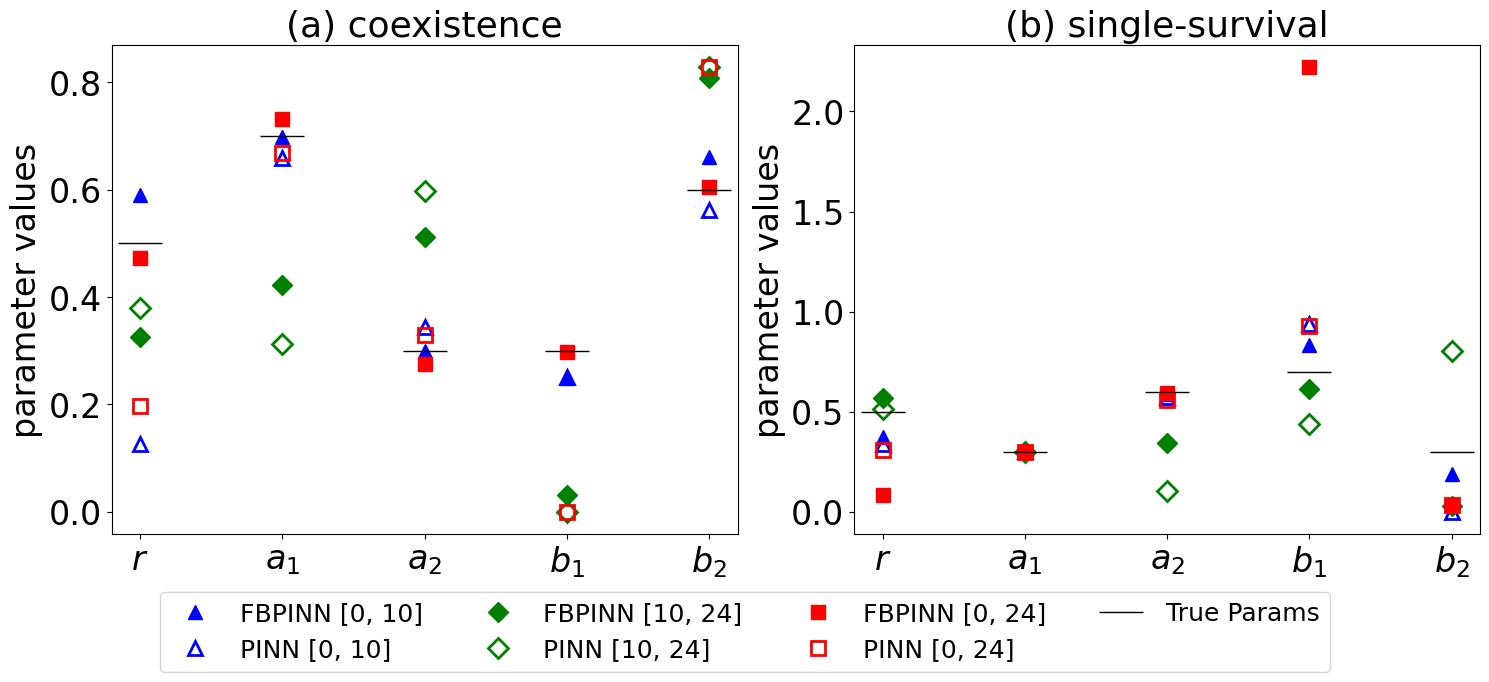

In [6]:
params = [r'$r$', r'$a_1$', r'$a_2$', r'$b_1$', r'$b_2$']
x = np.arange(len(params))

# Extracting data for each case from merged_df
coexistence_0_10 = merged_df[(merged_df['model_type'] == 'coexistence') & (merged_df['time_limit'] == '0-10')].iloc[0]
coexistence_10_24 = merged_df[(merged_df['model_type'] == 'coexistence') & (merged_df['time_limit'] == '10-24')].iloc[0]
coexistence_0_24 = merged_df[(merged_df['model_type'] == 'coexistence') & (merged_df['time_limit'] == '0-24')].iloc[0]

survival_0_10 = merged_df[(merged_df['model_type'] == 'survival') & (merged_df['time_limit'] == '0-10')].iloc[0]
survival_10_24 = merged_df[(merged_df['model_type'] == 'survival') & (merged_df['time_limit'] == '10-24')].iloc[0]
survival_0_24 = merged_df[(merged_df['model_type'] == 'survival') & (merged_df['time_limit'] == '0-24')].iloc[0]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Coexistence Case Plot
axs[0].plot(x, coexistence_0_10['learned_params_fbpinn'], '^', color='blue', label='FBPINN [0, 10]', markerfacecolor='blue', markersize=10)
axs[0].plot(x, coexistence_0_10['learned_params_sciann'], '^', color='blue', label='PINN [0, 10]', markerfacecolor='none', markeredgewidth=2, markersize=10)
axs[0].plot(x, coexistence_10_24['learned_params_fbpinn'], 'D', color='green', label='FBPINN [10, 24]', markerfacecolor='green', markersize=10)
axs[0].plot(x, coexistence_10_24['learned_params_sciann'], 'D', color='green', label='PINN [10, 24]', markerfacecolor='none', markeredgewidth=2, markersize=10)
axs[0].plot(x, coexistence_0_24['learned_params_fbpinn'], 's', color='red', label='FBPINN [0, 24]', markerfacecolor='red', markersize=10)
axs[0].plot(x, coexistence_0_24['learned_params_sciann'], 's', color='red', label='PINN [0, 24]', markerfacecolor='none', markeredgewidth=2, markersize=10)
axs[0].plot(x, coexistence_0_24['true_params'], '_', color='black', label='True Params', markersize=32)
axs[0].set_xticks(x)
axs[0].set_xticklabels(params, fontsize=24)
axs[0].set_ylabel('parameter values', fontsize=24)
axs[0].set_title('(a) coexistence', fontsize=26)
axs[0].tick_params(axis='y', labelsize=24) 
# axs[0].legend(loc='upper left')

# Survival Case Plot
axs[1].plot(x, survival_0_10['learned_params_fbpinn'], '^', color='blue', label='FBPINN [0, 10]', markerfacecolor='blue', markersize=10)
axs[1].plot(x, survival_0_10['learned_params_sciann'], '^', color='blue', label='PINN [0, 10]', markerfacecolor='none', markeredgewidth=2, markersize=10)
axs[1].plot(x, survival_10_24['learned_params_fbpinn'], 'D', color='green', label='FBPINN [10, 24]', markerfacecolor='green', markersize=10)
axs[1].plot(x, survival_10_24['learned_params_sciann'], 'D', color='green', label='PINN [10, 24]', markerfacecolor='none', markeredgewidth=2, markersize=10)
axs[1].plot(x, survival_0_24['learned_params_fbpinn'], 's', color='red', label='FBPINN [0, 24]', markerfacecolor='red', markersize=10)
axs[1].plot(x, survival_0_24['learned_params_sciann'], 's', color='red', label='PINN [0, 24]', markerfacecolor='none', markeredgewidth=2, markersize=10)
axs[1].plot(x, survival_0_24['true_params'], '_', color='black', label='True Params', markersize=32)
axs[1].set_xticks(x)
axs[1].set_xticklabels(params, fontsize=24)
axs[1].set_ylabel('parameter values', fontsize=24)
axs[1].set_title('(b) single-survival', fontsize=26)
axs[1].tick_params(axis='y', labelsize=24)
# axs[1].legend(loc='upper left')

# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
# axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=18)

# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=18)



plt.tight_layout()
# plt.show()


tikzplotlib.save("learned_parameters.tex") # works with sciann but not with fbpinn


Energy Plots

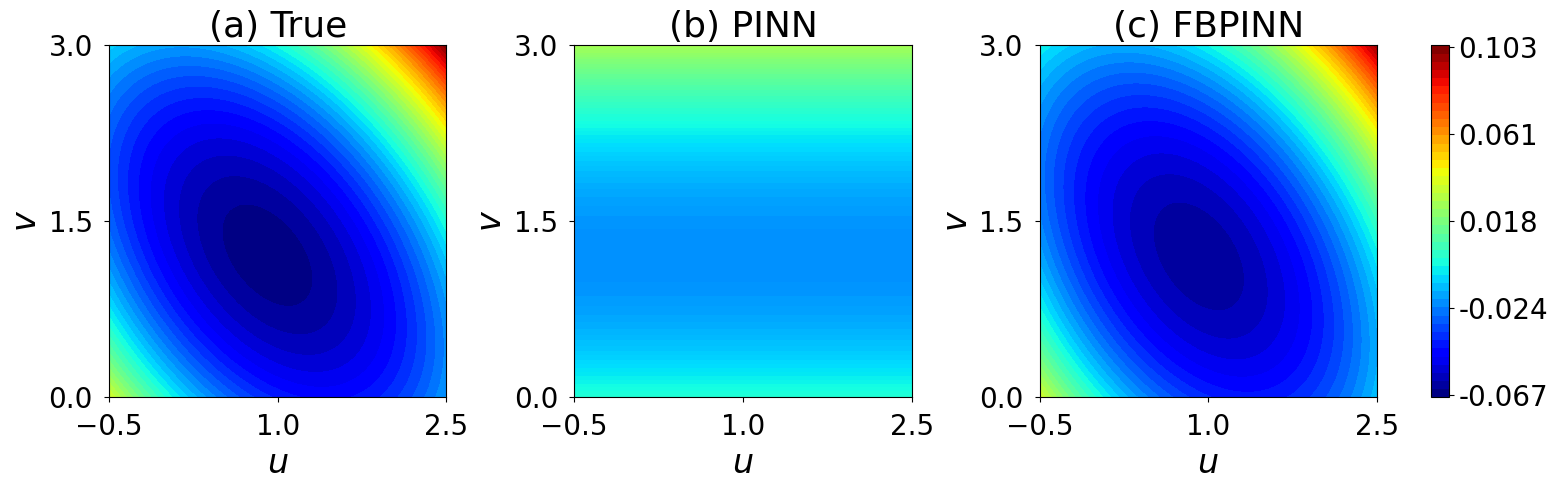

In [7]:
# Single colorbar

import sys
import os
import numpy as np

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# from FBPINNsModel.plot import phi_comp, export_energy_plot

def phi_comp(u, v, params):
     r, a1, a2, b1, b2 = params
    #  return (- b1 * b2 * u + 0.5 * b1 * b2 * a1 * u**2 + b1 * b2 * a2 * v * u -
    #         a1 * a2 * r * v + a1 * a2 * r * b1 * u * v + 0.5 * a1 * a2 * r * b2 * v**2)
     return (-a1*b2*r*(b1*u+a2*v) + a1*a2*b1*b2*r*u*v + 0.5*r*a1*b2*(a1*b1*u*u + a2*b2*v*v))


# modified energy plot function
def plot_energy(phi_values, u, v, ax=None, set_title=None, vmin=None, vmax=None):
    if ax is None:
        plt.figure(figsize=(4, 3))
        ax = plt.gca()
    
    contour = ax.contourf(u, v, phi_values, levels=50, cmap='jet', vmin=vmin, vmax=vmax)
    
    if set_title is None:
        ax.set_title("Energy Landscape (Lyapunov Function)")
    else:
        ax.set_title(set_title, fontsize=26)

    ax.set_xticks(np.linspace(u.min(), u.max(), 3))  
    ax.set_yticks(np.linspace(v.min(), v.max(), 3))
    
    ax.set_xlabel("$u$", fontsize=24)
    ax.set_ylabel("$v$", fontsize=24)
    ax.tick_params(axis='x', labelsize=20, pad=8)
    ax.tick_params(axis='y', labelsize=20, pad=8)

    if ax is None:
        plt.show()
    else:
        return contour

# 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

u_range = np.linspace(-.5, 2.5, 500)
v_range = np.linspace(0, 3, 500)
u, v = np.meshgrid(u_range, v_range)

# Coexistence Case - Phi values
phi_comp_valuee_true = phi_comp(u, v, coexistence_0_24['true_params'])
phi_comp_valuee_fbpinn = phi_comp(u, v, coexistence_0_24['learned_params_fbpinn'])
phi_comp_valuee_sciann = phi_comp(u, v, coexistence_0_24['learned_params_sciann'])

phi_min = min(phi_comp_valuee_true.min(), phi_comp_valuee_fbpinn.min(), phi_comp_valuee_sciann.min())
phi_max = max(phi_comp_valuee_true.max(), phi_comp_valuee_fbpinn.max(), phi_comp_valuee_sciann.max())


# Coexistence Case - plot energy
contour_true = plot_energy(phi_values=phi_comp_valuee_true, u=u, v=v, ax=axs[0], set_title='(a) True', vmin=phi_min, vmax=phi_max)
contour_fbpinn = plot_energy(phi_values=phi_comp_valuee_fbpinn, u=u, v=v, ax=axs[2], set_title='(c) FBPINN', vmin=phi_min, vmax=phi_max)
contour_sciann = plot_energy(phi_values=phi_comp_valuee_sciann, u=u, v=v, ax=axs[1], set_title='(b) PINN', vmin=phi_min, vmax=phi_max)

plt.tight_layout()
cbar = fig.colorbar(contour_true, ax=axs, location='right', pad=0.04, fraction=0.02, boundaries = np.linspace(phi_min, phi_max, 100))
cbar_ticks = np.linspace(phi_min, phi_max, 5)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([f"{tick:.3f}" for tick in cbar_ticks])
cbar.ax.tick_params(labelsize=20)
plt.savefig("coexistence_0_24.png", bbox_inches='tight')

# tikzplotlib.clean_figure()
tikzplotlib.save("coexistence_0_24.tex")
